# Univariate ARIMA

### Import Packages

In [1]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data

In [2]:
path = os.getcwd()
path = path.replace('modeling', 'data_preprocessing')
files = os.listdir(path)
for file in files:
    if len(file.split('.csv'))>1:
        csv_path = path+'/'+file
data = pd.read_csv(csv_path)
data['date']=pd.to_datetime(data['date'])

In [3]:
# Univariate data
uv_data = data[data.columns[:2]].set_index(data.columns[0])
uv_data =  uv_data.rename(columns = {data.columns[1]:'target'})
uv_data.head(3)

,target
date,
2000-01-01,41.0
2000-02-01,41.0
2000-03-01,45.0


### Identify AR I MA components

In [4]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

stepwise_result = auto_arima(uv_data['target'], start_p= 1, start_d=0, start_q=1,
                             m=12, start_P=0, D=1, start_Q=0,
                             seasonal=True,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True, n_fits=100)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=1652.710, Time=0.06 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=2271.691, Time=0.01 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1621.639, Time=0.23 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=1908.180, Time=0.41 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=2273.960, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1702.590, Time=0.03 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1601.434, Time=0.64 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=2212.180, Time=0.47 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1534.489, Time=1.04 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1567.730, Time=0.25 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept   : 

In [5]:
print(stepwise_result.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                       y   No. Observations:                  276
Model:             SARIMAX(2, 0, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -738.788
Date:                                 Tue, 06 Jun 2023   AIC                           1491.575
Time:                                         13:20:15   BIC                           1516.607
Sample:                                     01-01-2000   HQIC                          1501.634
                                          - 12-01-2022                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4154      0.043     33.303      0.000       1.332       1

In [6]:
stepwise_fit = auto_arima(uv_data['target'], seasonal=True, m=12,
                          suppress_warnings=True, 
                          error_action="ignore", max_order=None, stepwise=True)

# To print the summary
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  276
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -758.797
Date:                Tue, 06 Jun 2023   AIC                           1525.593
Time:                        13:20:20   BIC                           1540.060
Sample:                    01-01-2000   HQIC                          1531.399
                         - 12-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3465      0.047     28.558      0.000       1.254       1.439
ar.L2         -0.4283      0.035    -12.395      0.000      -0.496      -0.361
ma.L1         -0.9513      0.045    -21.211      0.000      -1.039      -0.863
sigma2        14.5690      0.404     36.026      0.000      13.776      15.362
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              5924.73
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               2.58   Skew:                            -3.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The above suggests the presensece of Heteroskedasticty and Non-normality

### Train Test Split

In [7]:
X_train = uv_data[:-12]
X_test = uv_data[-12:]

### Fit the first model

In [8]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1 = SARIMAX(X_train['target'], order=(2,0,0), seasonal_order=(2, 1, [1, 2], 12))

In [9]:
model1_fit = model1.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88163D+00    |proj g|=  4.22712D-01

At iterate    5    f=  2.69981D+00    |proj g|=  4.89234D-02

At iterate   10    f=  2.68191D+00    |proj g|=  7.13978D-03

At iterate   15    f=  2.68098D+00    |proj g|=  1.28340D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     18     19      1     0     0   6.690D-05   2.681D+00
  F =   2.6809750980783251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


### Predictions with First Model

In [10]:
predictions1 = model1_fit.get_forecast(steps = len(X_test)).predicted_mean

In [11]:
result1 = pd.concat([uv_data['target'].rename('Actual'), predictions1.rename('Predicted')], axis=1)

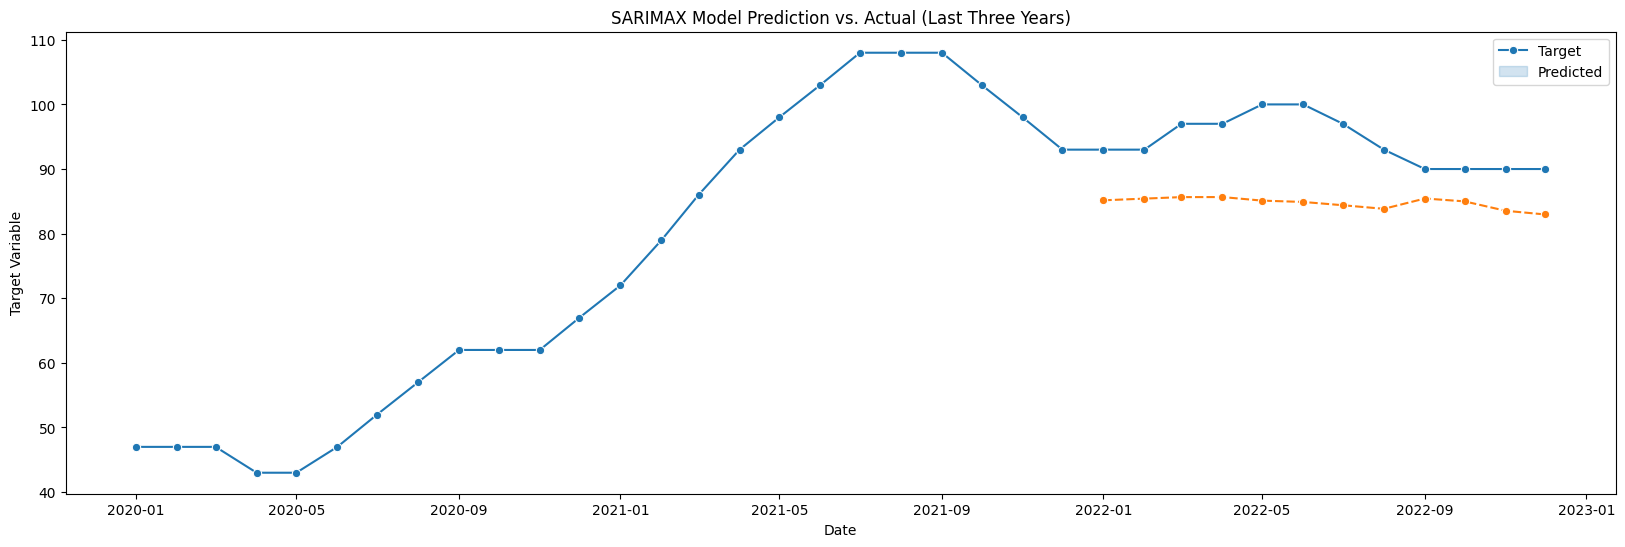

In [12]:
# Filter the results for the last three years
last_three_years = result1.iloc[-36:]

# Plot the results using seaborn
plt.figure(figsize=(20, 6))
sns.lineplot(data=last_three_years, marker='o')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.title('SARIMAX Model Prediction vs. Actual (Last Three Years)')
plt.legend(['Target', 'Predicted'])
plt.show()

### Fit the Second Model

In [13]:
from statsmodels.tsa.arima.model import ARIMA
model2 = ARIMA(X_train['target'], order=(2,1,1))
model2_fit = model2.fit()

### Predictions with Second Model

In [14]:
predictions2 = model2_fit.get_forecast(steps = len(X_test)).predicted_mean

In [15]:
result2 = pd.concat([uv_data['target'].rename('Actual'), predictions2.rename('Predicted')], axis=1)

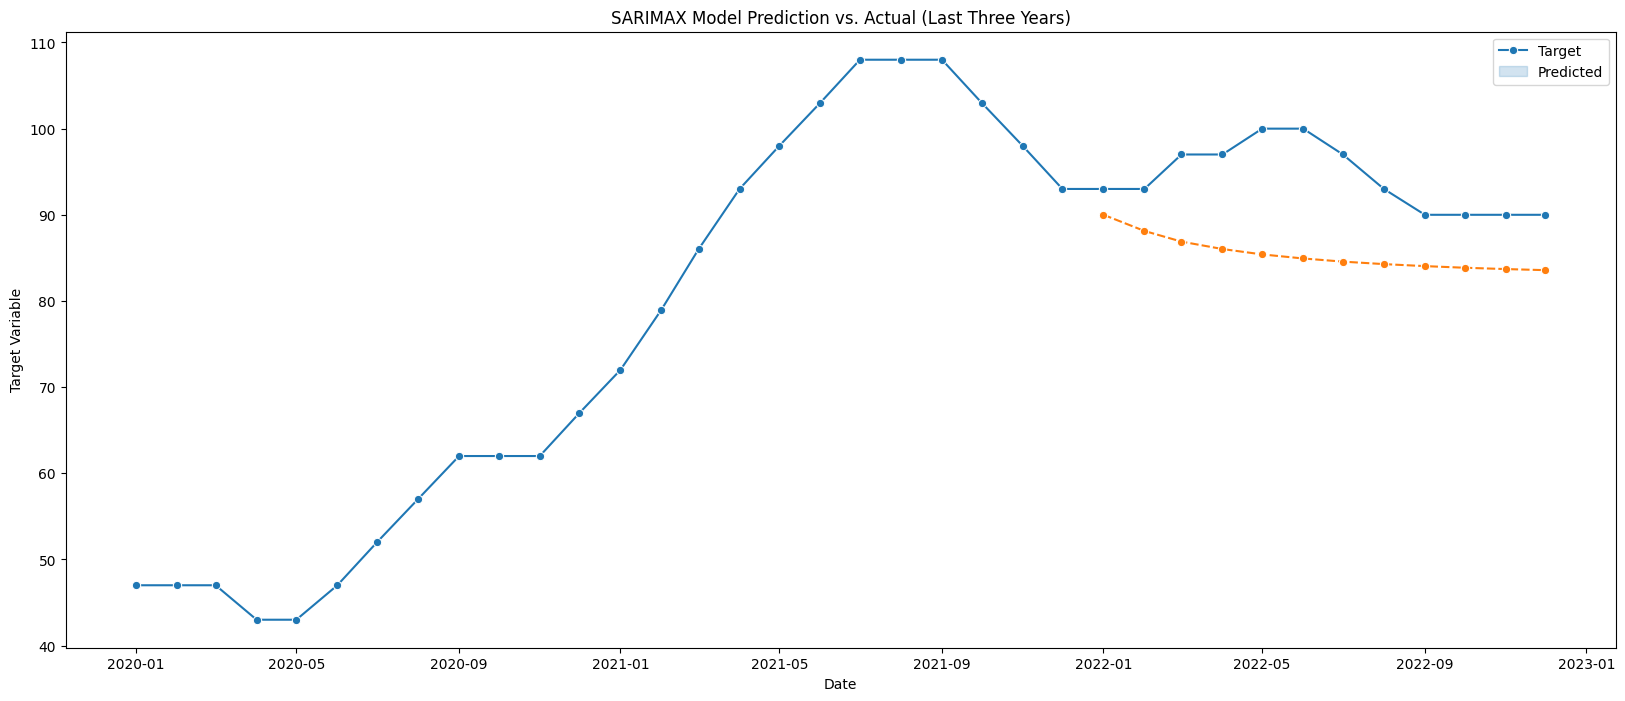

In [16]:
# Filter the results for the last three years
last_three_years = result2.iloc[-36:]

# Plot the results using seaborn
plt.figure(figsize=(20, 8))
sns.lineplot(data=last_three_years, marker='o')
plt.xlabel('Date')
plt.ylabel('Target Variable')
plt.title('SARIMAX Model Prediction vs. Actual (Last Three Years)')
plt.legend(['Target', 'Predicted'])
plt.show()

### Evaluation
Visually we can see that Model 1 gives a comparitivelty better prediction

#### Summary

In [17]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                  target   No. Observations:                  264
Model:             SARIMAX(2, 0, 0)x(2, 1, [1, 2], 12)   Log Likelihood                -707.777
Date:                                 Tue, 06 Jun 2023   AIC                           1429.555
Time:                                         13:20:22   BIC                           1454.261
Sample:                                     01-01-2000   HQIC                          1439.496
                                          - 12-01-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4243      0.043     33.053      0.000       1.340       1.509
ar.L2         -0.4628      0.045    -10.305      0.000      -0.551      -0.375
ar.S.L12      -0.9844      0.330     -2.982      0.003      -1.631      -0.337
ar.S.L24      -0.1488      0.076     -1.964      0.050      -0.297      -0.000
ma.S.L12       0.0471      0.335      0.141      0.888      -0.608       0.703
ma.S.L24      -0.7271      0.290     -2.507      0.012      -1.295      -0.159
sigma2        14.8839      0.716     20.779      0.000      13.480      16.288
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3705.28
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               3.09   Skew:                            -2.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                  264
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -729.649
Date:                Tue, 06 Jun 2023   AIC                           1467.298
Time:                        13:20:22   BIC                           1481.587
Sample:                    01-01-2000   HQIC                          1473.040
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3504      0.046     29.116      0.000       1.259       1.441
ar.L2         -0.4332      0.036    -12.108      0.000      -0.503      -0.363
ma.L1         -0.9525      0.043    -22.060      0.000      -1.037      -0.868
sigma2        15.0122      0.429     34.988      0.000      14.171      15.853
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              5430.91
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               3.86   Skew:                            -3.00
Prob(H) (two-sided):                  0.00   Kurtosis:                        24.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [19]:
result1 = result1.iloc[-12:,:]
result2 = result2.iloc[-12:,:]

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate RMSE
rmse_sarimax = np.sqrt(mean_squared_error(result1['Actual'], result1['Predicted']))
rmse_arima = np.sqrt(mean_squared_error(result2['Actual'], result2['Predicted']))

# Calculate MSE
mse_sarimax = mean_squared_error(result1['Actual'], result1['Predicted'])
mse_arima = mean_squared_error(result2['Actual'], result2['Predicted'])

# Calculate R2
r2_sarimax = r2_score(result1['Actual'], result1['Predicted'])
r2_arima = r2_score(result2['Actual'], result2['Predicted'])

# Calculate MAE
mae_sarimax = mean_absolute_error(result1['Actual'], result1['Predicted'])
mae_arima = mean_absolute_error(result2['Actual'], result2['Predicted'])

# Calculate MAPE
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape_sarimax = calculate_mape(result1['Actual'], result1['Predicted'])
mape_arima = calculate_mape(result2['Actual'], result2['Predicted'])

# Calculate directional accuracy
def calculate_directional_accuracy(actual, predicted):
    directional_accuracy = (np.sign(actual.diff()) == np.sign(predicted.diff())).mean()
    return directional_accuracy * 100

directional_accuracy_sarimax = calculate_directional_accuracy(result1['Actual'], result1['Predicted'])
directional_accuracy_arima = calculate_directional_accuracy(result2['Actual'], result2['Predicted'])

# Print the evaluation metrics
print("SARIMAX Model Evaluation:")
print(f"RMSE: {rmse_sarimax:.2f}")
print(f"MSE: {mse_sarimax:.2f}")
print(f"R2: {r2_sarimax:.2f}")
print(f"MAE: {mae_sarimax:.2f}")
print(f"MAPE: {mape_sarimax:.2f}%")
print(f"Directional Accuracy: {directional_accuracy_sarimax:.2f}%")
print()
print("ARIMA Model Evaluation:")
print(f"RMSE: {rmse_arima:.2f}")
print(f"MSE: {mse_arima:.2f}")
print(f"R2: {r2_arima:.2f}")
print(f"MAE: {mae_arima:.2f}")
print(f"MAPE: {mape_arima:.2f}%")
print(f"Directional Accuracy: {directional_accuracy_arima:.2f}%")


SARIMAX Model Evaluation:
RMSE: 10.02
MSE: 100.47
R2: -6.28
MAE: 9.41
MAPE: 9.87%
Directional Accuracy: 25.00%

ARIMA Model Evaluation:
RMSE: 9.49
MSE: 90.05
R2: -5.52
MAE: 8.72
MAPE: 9.14%
Directional Accuracy: 25.00%


### Conclusion

Although SARIMAX model showed a lower AIC in training, the ARIMA model proved to be slightly better in predicting in comparison with the test set.

We have already seen that the presence of Heteroskedasiticty and Non-normality in the data.

Overall, The prediction power of univariate ARIMA models is weak for the given data due to the global scenarios that prevailed during the period , as discussed during EDA.